In [30]:
# This is the code for house price prediction using Kaggle data

In [31]:
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm 
from statsmodels.stats.diagnostic import het_breuschpagan

In [32]:
import os
print(os.getcwd())

/Users/neginmousavi/Documents/Skills/Python


In [33]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#all = pd.concat([train, test], ignore_index = True)

# print(train.head())
#display(train.describe(include='all'), test.describe(include = 'all'), all.describe(include = 'all'))

In [34]:

# # some data checks
# clean = train.dropna()   # checking ho


# plt.figure(figsize=(10, 6))
# sns.heatmap(clean.isnull(), cmap="viridis", cbar=False, yticklabels=False)
# plt.title("Missing Values Heatmap")
# plt.show()


In [35]:
# data wrangling steps:

# 1 transform all to same unit (acre to sqft)

if 'lot_size_units' in train.columns:
    train['lot_size'] = train.apply(lambda row: row['lot_size']*43560 if row['lot_size_units'] =='acre' else row['lot_size'], axis = 1)

if 'lot_size_units' in test.columns:
    test['lot_size'] = test.apply(lambda row: row['lot_size']*43560 if row['lot_size_units'] =='acre' else row['lot_size'], axis = 1)



train = train.drop(columns=['lot_size_units'], errors = 'ignore')
test = test.drop(columns=['lot_size_units'], errors = 'ignore')

# try:   
#     train = train.drop(columns=['lot_size_units'])
# except KeyError:
#     pass

    
display(train)

# 2 # counting the number of na's in each col and fill_na size_units, drop any na prices 

print(train.isna().sum())
print(test.isna().sum())

train['lot_size'] = train['lot_size'].fillna(train.groupby('beds')['lot_size'].transform('mean'))
test['lot_size'] = test['lot_size'].fillna(test.groupby('beds')['lot_size'].transform('mean'))

display(train)

# 4 create dummies for zip_code
train = train.drop(columns = ['size_units'], errors = 'ignore')
test = test.drop(columns = ['size_units'], errors = 'ignore')
#train = pd.get_dummies(train, columns = ['zip_code'], drop_first = True)

train_categories = pd.get_dummies(train['zip_code'], prefix = 'zip_code')
train = pd.concat([train.drop(columns=['zip_code']), train_categories], axis=1)

display(train)

,beds,baths,size,size_units,lot_size,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,98102,950000.0
...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,21780.0,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.0,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,98103,590000.0


beds            0
baths           0
size            0
size_units      0
lot_size      347
zip_code        0
price           0
dtype: int64
beds           0
baths          0
size           0
size_units     0
lot_size      77
zip_code       0
price          0
dtype: int64


,beds,baths,size,size_units,lot_size,zip_code,price
0,3,2.5,2590.0,sqft,6000.000000,98144,795000.0
1,4,2.0,2240.0,sqft,13503.600000,98106,915000.0
2,4,3.0,2040.0,sqft,3783.000000,98107,950000.0
3,4,3.0,3800.0,sqft,5175.000000,98199,1950000.0
4,2,2.0,1042.0,sqft,14829.666829,98102,950000.0
...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,21780.000000,98112,910000.0
2012,1,1.0,889.0,sqft,207847.207143,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.000000,98199,1150000.0
2014,2,2.0,795.0,sqft,14829.666829,98103,590000.0


,beds,baths,size,lot_size,price,zip_code_98101,zip_code_98102,zip_code_98103,zip_code_98104,zip_code_98105,...,zip_code_98126,zip_code_98133,zip_code_98136,zip_code_98144,zip_code_98146,zip_code_98164,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98199
0,3,2.5,2590.0,6000.000000,795000.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,4,2.0,2240.0,13503.600000,915000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,3.0,2040.0,3783.000000,950000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,3.0,3800.0,5175.000000,1950000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2,2.0,1042.0,14829.666829,950000.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,21780.000000,910000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012,1,1.0,889.0,207847.207143,550000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2013,4,2.0,2140.0,6250.000000,1150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2014,2,2.0,795.0,14829.666829,590000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# # Fill missing values in numerical columns with the mean
# for col in train.select_dtypes(include='number').columns:
#     train[col] = train[col].fillna(train[col].mean())

# # Fill missing values in categorical columns with the mode (most frequent value)
# for col in train.select_dtypes(include='object').columns:
#     train[col] = train[col].fillna(train[col].mode()[0])


,beds,baths,size,lot_size,zip_code_98101,zip_code_98102,zip_code_98103,zip_code_98104,zip_code_98105,zip_code_98106,...,zip_code_98126,zip_code_98133,zip_code_98136,zip_code_98144,zip_code_98146,zip_code_98164,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98199
0,3,2.5,2590.0,6000.000000,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,4,2.0,2240.0,13503.600000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,4,3.0,2040.0,3783.000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,3.0,3800.0,5175.000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2,2.0,1042.0,14829.666829,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,21780.000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012,1,1.0,889.0,207847.207143,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2013,4,2.0,2140.0,6250.000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2014,2,2.0,795.0,14829.666829,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


0        795000.0
1        915000.0
2        950000.0
3       1950000.0
4        950000.0
          ...    
2011     910000.0
2012     550000.0
2013    1150000.0
2014     590000.0
2015     659000.0
Name: price, Length: 2016, dtype: float64

226612.80031005968 [-6.04110972e+04  4.64313146e+04  4.64275308e+02 -6.69487870e-02
  2.46125447e+05  2.70472711e+05  3.26140717e+04 -7.02458614e+04
  8.62561421e+05 -1.92860110e+05  7.62650237e+03 -1.81701231e+05
  1.38027155e+05  3.45476111e+05 -2.43111700e+04  1.14873287e+04
  2.11306242e+04 -2.01209614e+05  4.32805341e+04  1.20424212e+05
  1.44330013e+04 -1.06757327e+05 -1.72639907e+05 -1.77048302e+05
 -5.24024472e+04 -5.94393034e+04 -2.60899397e+05 -1.38523479e+04
 -4.19421288e+05 -1.48991231e+04 -2.63038847e+05  9.70671569e+04]
MSE = 660734042647.734497 , R2 = 0.258331


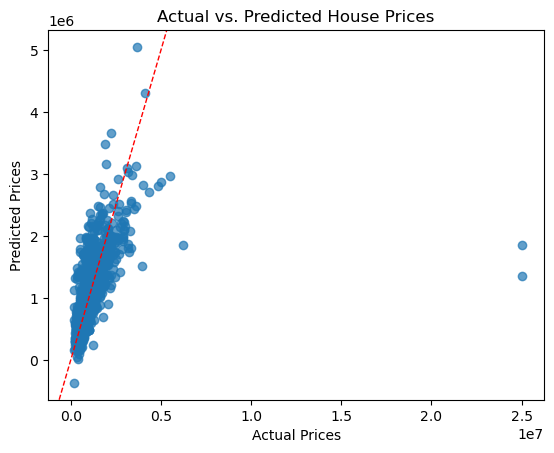

(array([  61,  637, 1359, 1700]),) 61      -3.096523
637     -5.395022
1359   -29.090916
1700   -28.479473
Name: price, dtype: float64 [  61  637 1359 1700]
No outlier model: MSE = 86807941302.188736 , R2 = 0.704152
226612.80031005968 [-6.04110972e+04  4.64313146e+04  4.64275308e+02 -6.69487870e-02
  2.46125447e+05  2.70472711e+05  3.26140717e+04 -7.02458614e+04
  8.62561421e+05 -1.92860110e+05  7.62650237e+03 -1.81701231e+05
  1.38027155e+05  3.45476111e+05 -2.43111700e+04  1.14873287e+04
  2.11306242e+04 -2.01209614e+05  4.32805341e+04  1.20424212e+05
  1.44330013e+04 -1.06757327e+05 -1.72639907e+05 -1.77048302e+05
 -5.24024472e+04 -5.94393034e+04 -2.60899397e+05 -1.38523479e+04
 -4.19421288e+05 -1.48991231e+04 -2.63038847e+05  9.70671569e+04]
127901.0996540389 [-4.23115847e+04  6.47187098e+04  4.54299429e+02 -4.43379848e-02
  3.02530210e+05  2.36718572e+05  5.21805531e+04 -1.14426865e+04
  1.71511925e+05 -1.71566605e+05  3.43866631e+04 -1.65633278e+05
  1.74591352e+05  3.58852355e+0

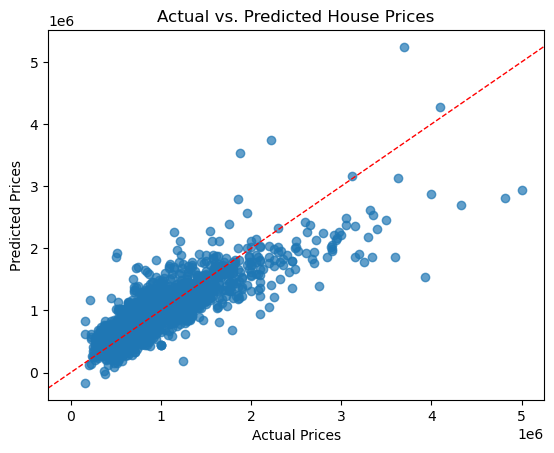

In [37]:
# run the model

X = train.drop(columns = 'price')
y = train['price']

display(X, y)
model1 = lm().fit(X,y)

print(model1.intercept_, model1.coef_)

from sklearn.metrics import mean_squared_error, r2_score


y_pred = model1.predict(X)
resid = y_pred - y
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('MSE = %f , R2 = %f' % (mse, r2) )

plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.axline((0, 0), slope=1, color='r', linestyle='--', linewidth=1)  # 45-degree reference line
plt.show()


# find outliers
resid_norm = resid / np.std(resid)
outliers = np.where(np.abs(resid_norm) > 3)
print(outliers, resid_norm.iloc[outliers], outliers[0])

type(outliers[0])


# drop those rows and re-run the regression
train_no_outlier = train.drop(index = outliers[0])
X2 = train_no_outlier.drop(columns = 'price')
y2 = train_no_outlier['price']
model2 = lm().fit(X2,y2)


y2_pred = model2.predict(X2)
resid2 = y2_pred - y2
mse2 = mean_squared_error(y2, y2_pred)
r2_no_outlier = r2_score(y2, y2_pred)
print('No outlier model: MSE = %f , R2 = %f' % (mse2, r2_no_outlier) )

print(model1.intercept_, model1.coef_)
print(model2.intercept_, model2.coef_)

plt.scatter(y2, y2_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.axline((0, 0), slope=1, color='r', linestyle='--', linewidth=1)  # 45-degree reference line
plt.show()

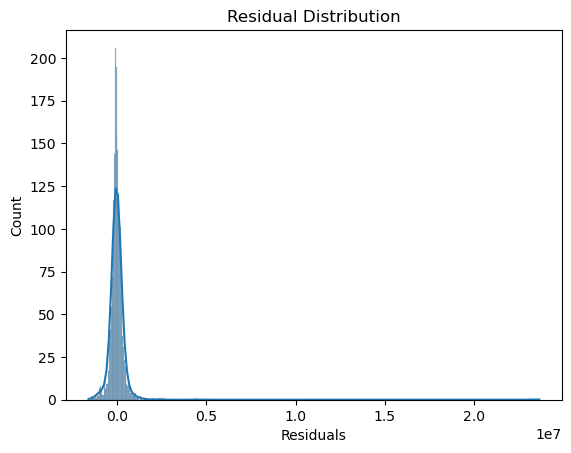

In [38]:
# model validation

# check residuals of model1/2
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y - model1.predict(X)  # residuals = y2 - model2.predict(X)

sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

In [39]:
# Use test data 

# fill in zip_code by geolocation

# Load ZIP code dataset (contains ZIP, Latitude, Longitude) - source : https://simplemaps.com/data/us-zips
train0 = pd.read_csv('train.csv')
train0.drop(index = outliers[0])
zip_train = pd.DataFrame(train0['zip_code'].unique())
zip_train.columns = ["zip_code"]

zip_data = pd.read_csv("/Users/neginmousavi/Documents/Research/Zipcode_location_data/simplemaps_uszips_basicv1/uszips.csv")

zip_train = zip_train.merge(zip_data[["zip", "lat", "lng"]], left_on = 'zip_code', right_on = 'zip', how = 'left').drop(columns=['zip'])
print(zip_train)

test = test.merge(zip_data[["zip", "lat", "lng"]], left_on = 'zip_code', right_on = 'zip', how = 'left').drop(columns=['zip'])


############################
from sklearn.neighbors import KDTree
import numpy as np

# Prepare KDTree for fast nearest neighbor search
train_locations = zip_train[['lat', 'lng']].dropna().values
train_zipcodes = zip_train['zip_code'].values  # Keep ZIP code reference
tree = KDTree(train_locations, leaf_size=10)  # Build KDTree

# Find the nearest ZIP code for test rows with missing ZIPs
def find_nearest_zip(lat, lon):
    if pd.isna(lat) or pd.isna(lon):  # Skip if no location data
        return np.nan
    dist, idx = tree.query([[lat, lon]], k=1)  # Find nearest neighbor
    return train_zipcodes[idx[0][0]]  # Return the nearest ZIP

# Apply function to test data where ZIPs were missing in train
test['nearest_zip'] = test.apply(lambda row: find_nearest_zip(row['lat'], row['lng']), axis=1)
############################
print(test)


#test2["projected_zip"]

    zip_code       lat        lng
0      98144  47.58582 -122.29205
1      98106  47.54339 -122.35366
2      98107  47.66757 -122.37789
3      98199  47.65139 -122.40223
4      98102  47.63627 -122.32337
5      98133  47.73990 -122.34432
6      98105  47.66094 -122.28321
7      98108  47.54113 -122.31260
8      98178  47.49921 -122.24735
9      98103  47.67320 -122.34258
10     98177  47.74237 -122.37085
11     98115  47.68547 -122.28234
12     98122  47.60985 -122.29569
13     98119  47.63943 -122.36932
14     98117  47.68820 -122.38157
15     98116  47.57399 -122.39503
16     98146  47.50008 -122.35768
17     98109  47.63128 -122.34486
18     98125  47.71706 -122.29969
19     98101  47.61119 -122.33454
20     98126  47.54732 -122.37454
21     98118  47.54235 -122.26872
22     98112  47.63242 -122.28732
23     98121  47.61548 -122.34668
24     98136  47.53686 -122.38992
25     98168  47.48898 -122.30175
26     98104  47.60044 -122.33004
27     98164  47.60596 -122.33203
     beds  bat

In [40]:
test_categories = pd.get_dummies(test['nearest_zip'], prefix = 'zip_code')

# Align columns with training data (fill missing columns with 0)
test_categories = test_categories.reindex(columns=train_categories.columns, fill_value=0)

y_test = test['price']
test= pd.concat([test.drop(columns = ['nearest_zip', 'zip_code', 'lat', 'lng', 'price']), test_categories], axis = 1)

print(test_categories)



     zip_code_98101  zip_code_98102  zip_code_98103  zip_code_98104  \
0             False           False           False           False   
1             False           False           False           False   
2             False           False           False           False   
3             False           False           False           False   
4             False           False           False           False   
..              ...             ...             ...             ...   
500           False           False           False           False   
501           False           False           False           False   
502           False           False           False           False   
503           False           False           False           False   
504           False           False            True           False   

     zip_code_98105  zip_code_98106  zip_code_98107  zip_code_98108  \
0             False           False           False           False   
1    

In sample - First model: MSE = 660734042647.734497 , R2 = 0.258331
In sample - No outlier model: MSE = 86807941302.188736 , R2 = 0.704152
Out of sample - Test data : MSE = 145788272519.687439 , R2 = 0.605455
Breusch-Pagan test p-value: 0.0000
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     149.0
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:44:08   Log-Likelihood:                -28207.
No. Observations:                2012   AIC:                         5.648e+04
Df Residuals:                    1980   BIC:                         5.666e+04
Df Model:                          31                                         
Covariance Type:            nonrobust         

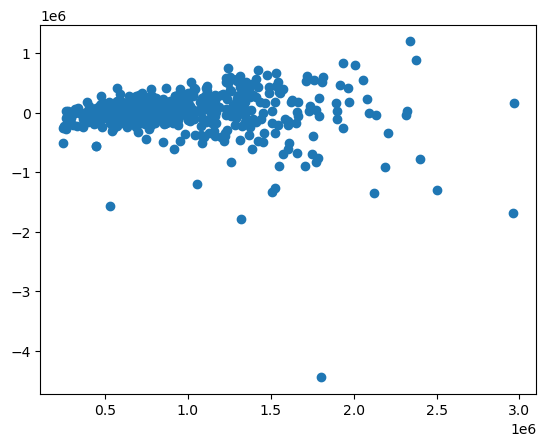

In [41]:
# Show results
#display(test)

y_test_pred = model2.predict(test)
resid_test = y_test_pred - y_test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sanity checks/validation
print('In sample - First model: MSE = %f , R2 = %f' % (mse, r2) )
print('In sample - No outlier model: MSE = %f , R2 = %f' % (mse2, r2_no_outlier) )
print('Out of sample - Test data : MSE = %f , R2 = %f' % (mse_test, r2_test) )

# Checking constant variance assumption
plt.scatter(y_test_pred, resid_test)

# Confirming Heteroskedasticity: Statistical Test: Breusch-Pagan Test
X_float =  sm.add_constant(X2.astype(float))
bp_test = het_breuschpagan(resid2, X_float)
p_value = bp_test[1]
print(f"Breusch-Pagan test p-value: {p_value:.4f}")  # If p-value < 0.05 → Increasing variance → Heteroskedasticity detected.


# Checking p-values and coefficients

model_sm = sm.OLS(y2, sm.add_constant(X2.astype(int))).fit()  # gotta add the intercept manually and also transform boolean dummy variables to 0/1 integers
print(model_sm.summary())



                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.620
Model:                            WLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:44:33   Log-Likelihood:                -27698.
No. Observations:                2012   AIC:                         5.546e+04
Df Residuals:                    1980   BIC:                         5.564e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.305e+05   1.19e+04     10.

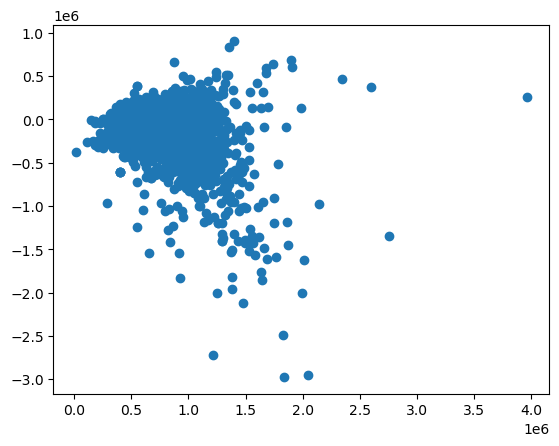

In [43]:
# Use GLS
weights = 1 / (y2**2)
X_gls = sm.add_constant(X2)
X_gls = X_gls.astype(float)
model_gls = sm.WLS(y2, X_gls, weights=weights).fit()
print(model_gls.summary())

y_gls_pred = model_gls.predict(X_gls)
resid_gls = y_gls_pred - y2

# calculate R2 - this is different from one calculated from the summary, because that one is weighted
ss_res = np.sum(resid_gls ** 2)  # Residual Sum of Squares
ss_tot = np.sum((y2 - np.mean(y2)) ** 2)  # Total Sum of Squares
r2_gls = 1 - (ss_res / ss_tot)

print(f"R² (Manual Calculation): {r2_gls:.4f}")

# 	In Weighted Least Squares (WLS), statsmodels calculates R² differently because it accounts for the weights applied to each observation.

plt.scatter(y_gls_pred, resid_gls)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     143.9
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:44:52   Log-Likelihood:                -274.64
No. Observations:                2012   AIC:                             613.3
Df Residuals:                    1980   BIC:                             792.7
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.3675      0.019    646.

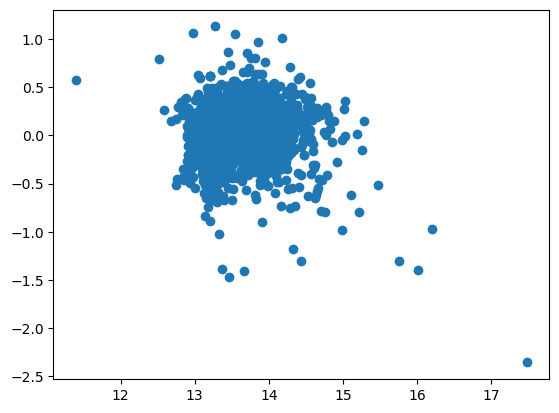

In [49]:
# Using log price instead of price to overcome heteroskedasticity of error term
def test_log_model(y, X):
    y_log = np.log(y)
    model_log = sm.OLS(y_log, X).fit()
    print(model_log.summary())

    y_log_pred = model_log.predict(X_gls)
    resid_log_pred = y_log - y_log_pred

    # Check 1: Error term vs predicted values 
    plt.scatter(y_log_pred, resid_log_pred)
    
    # Check 2: Breusch-Pagan test for heteroskedasticity
    bp_test = het_breuschpagan(resid_log_pred, X)
    p_value = bp_test[1]
    print(f"Breusch-Pagan test p-value: {p_value:.4f}")  # If p-value < 0.05 → Increasing variance → Heteroskedasticity detected.
    print(bp_test)
    
test_log_model(y2, X_gls)

In [ ]:
pip install xgboost

In [87]:
def XGBoost(y, X):
    from xgboost import XGBRegressor

    model_xgb = XGBRegressor(objective="reg:squarederror")  # Handles heteroskedasticity well
    model_xgb.fit(X, y)
    y_xgb_pred = model_xgb.predict(X)
    
    resid_xgb = y - y_xgb_pred
    r2 = r2_score(y, y_xgb_pred)
    print(f"R²: {r2:.4f}")

    #print(model_xgb.get_params())
    print(model_xgb.get_booster().attributes())
    #print(model_xgb.get_booster().save_config())
    print(model_xgb.get_params()["n_estimators"])
    
    #print(model_xgb.evals_result())

# in-sample:
XGBoost(y2, X_gls)
# out of sample:
XGBoost(y_test, test)

R²: 0.9777
{}
None
R²: 0.9985
{}
None


     beds  baths    size  lot_size  zip_code_98101  zip_code_98102  \
0       3    3.0  2850.0    4200.0           False           False   
1       4    5.0  3040.0    5002.0           False           False   
2       3    1.0  1290.0    6048.0           False           False   
3       3    2.0  2360.0   12196.8           False           False   
4       3    3.5  1942.0    1603.0           False           False   
..    ...    ...     ...       ...             ...             ...   
500     5    4.5  5580.0   13068.0           False           False   
501     3    2.5  1390.0    1570.0           False           False   
502     3    2.5  2950.0   20473.2           False           False   
503     5    5.0  3010.0    4887.0           False           False   
504     3    2.0  1301.0    3000.0           False           False   

     zip_code_98103  zip_code_98104  zip_code_98105  zip_code_98106  ...  \
0             False           False           False           False  ...   
1      